Gráfico 1: mostrar inercia en el caso y alternativas.
Gráfico 2: mostrar heterogeneidad.

Con el objetivo de resaltar las diferencias y la superioridad del enfoque evolucionista, esta sección presenta el modelo neoclásico como un caso de referencia. Específicamente, buscamos destacar tres elementos clave que dotan a los modelos evolutivos de mayor poder explicativo: la dependencia de la trayectoria (inercia), la presencia de procesos estocásticos y la heterogeneidad de las firmas.

De esta forma, este apéndice desarrolla el caso ``típico'' neoclásico, donde las decisiones de las firmas son deterministas, todas las empresas son idénticas y la innovación es el resultado de una asignación óptima de recursos, sin incertidumbre ni variabilidad en las trayectorias tecnológicas.

A partir de esta formulación, contrastaremos los resultados con el modelo evolucionista, evidenciando las limitaciones del marco neoclásico para capturar la dinámica real de los procesos de innovación y cambio tecnológico.

## Modelo Neoclásico
Para mantener la comparación con el modelo evolucionista de Winter, suponemos que la función de producción, la función inversa de la demanda, la función de beneficios y la estrategia de inversión en capital físico siguen la misma forma que en dicho modelo. La única diferencia radica en el proceso de innovación: en lugar de un mecanismo aleatorio, existe una función de generación de conocimiento, y las firmas asignan recursos de manera óptima a I+D.

Dado que todas las firmas son idénticas y operan en equilibrio, el sistema puede representarse mediante una única firma representativa, eliminando el subíndice $i$.

Las firmas pueden destinar recursos a innovación o imitación. En equilibrio, dado que todas enfrentan los mismos incentivos y la imitación solo es posible si al menos una firma innova, podemos asumir que todas las firmas se dedican a innovar.

La tecnología está determinada por la cantidad total de recursos destinados a I+D, presentando rendimientos decrecientes a escala. Suponemos que la evolución de la tecnología sigue la siguiente relación funcional:  

$$
A_{t+1} = \beta A_{t} + (1-\beta)(r_{nt}K_{t})^\alpha\notag
$$
donde $r_{nt} K_t$, al igual que el modelo de Winter, representa la cantidad de recursos totales destinados a innovación.  

De esta forma, el problema de la firma consiste en elegir $r_{nt}$ para maximizar sus beneficios:  

$$
\max_{r_{nt}} \pi_{t+1} = EP_{t+1} (\beta A_{t} + (1-\beta)(r_{nt}K_{t})^\alpha)  - c - r_{nt}\notag
$$
La condición de primer orden para la maximización del beneficio es:  
$$
\alpha (1-\beta)P_{t+1} K_t^\alpha r_{nt}^{\alpha-1} = 1\notag
$$
Resolviendo para $r_{nt}$
$$
r_{nt} = \left[\alpha P_{t+1} K_t^\alpha \right]^{\frac{1}{1-\alpha}}\notag
$$


In [1]:
n = 3

def generacion(At, K_t, r_nt, alpha): 
    return beta*At + (1-beta)*(K_t*r_nt)**(alpha)

def innovacion(alpha, p_t, At, K_t, D):
    return ((1-beta)*alpha*p_t*K_t**alpha)**1/(1-alpha)

def cantidad(A_t, K_t):
    return A_t*K_t

def precio(Q_t, D):
    return min(D/(Q_t),1.2)

def beneficio(A_t, p_t, r_nt, c):
    return p_t*A_t - c - r_nt

def investment(p_t, A_t, Q_t, q_t, pi_t, delta, c, BANK = 1):
    if pi_t<=0:
        fpi = delta + pi_t
    else:
        fpi = delta + (1 + BANK)*pi_t
    rho = p_t*A_t/float(c)
    s = q_t/float(Q_t)
    if s < 1 - 1e-8 :
        I_d = 1 + delta - float(2-s)/float(rho*(2-2*s))
    else:
        I_d = 1 - c/p_t
    return max(0,min(I_d,fpi))

def capitaldynamic(K_t, I_t, delta):
    return (1 - delta + I_t)*K_t

alpha = 0.1
K0 = 139.58
A0 = 0.16
D = 64
delta = 0.03
c = .16
beta = 0.5

In [2]:
t = 3000

r_nt, A_t, K_t = [0.002], [0.16], [139.58]
pi_t, q_t, I_t, p_t = [], [], [], []

for t in range(t):
    r_nt.append(0), A_t.append(0), K_t.append(0), pi_t.append(0), q_t.append(0), I_t.append(0), p_t.append(0)
    
    q_t[t] = cantidad(A_t[t], K_t[t])
    if q_t[t]  == 0:
        break
    
    p_t[t] = precio(n*q_t[t], D)
    r_nt[t+1] = innovacion(alpha, p_t[t], A0, K_t[t], D)
   
    pi_t[t] = beneficio(A_t[t], p_t[t], r_nt[t], c)
    I_t[t] = investment(p_t[t], A_t[t], 2*q_t[t], q_t[t], pi_t[t], delta, c, BANK = 1)
    A_t[t+1] = generacion(A_t[t], K_t[t], r_nt[t], alpha)
    K_t[t+1] = capitaldynamic(K_t[t], I_t[t], delta)

In [3]:
NEOA_t = A_t
cambios =[0] +  [A_t[i] if A_t[i] - A_t[i-1]>0.0001 else 0 for i in range(1, len(A_t))]


In [4]:
import numpy as np

def quantity_it(A_it,K_it):
    return A_it*K_it

def price_t(Q_t, D, eta):
    return min(D/Q_t**(1/eta),1.20)

def profit_rate(A_it, p_t, r_im, r_in, c, I):
    return p_t*A_it - c + 0.01*I - r_im - r_in

def dummy_imt(r_im, K_it, a_m):
    prob_imt = a_m*r_im*K_it
    prob_imt = min(max(prob_imt, 0),1)
    return np.random.choice([0, 1], p=[1 - prob_imt, prob_imt])
    
def dummy_int(r_in, K_it, a_n):
    prob_int = a_n*r_in*K_it
    prob_int = min(max(prob_int, 0),1)
    return np.random.choice([0, 1], p=[1 - prob_int, prob_int])

# Entrepreneurship Regime
def innov(mu, sigma , t):
    lambda_t = mu + 0.01*t
    return np.random.normal(loc=lambda_t, scale=sigma)

def A_it1(A_it, d_imt, d_int, t, Amax, mu, sigma):
    innov_it = np.exp(innov(mu, sigma, t))    
    tildeA_it = d_int*innov_it
    hatA_it = d_imt*Amax
    
      
    return max(A_it, hatA_it, tildeA_it), hatA_it, tildeA_it

def investment(p_t, A_it, Q_t, q_it, pi_it, delta, c, BANK = 1):
    if pi_it<=0:
        fpi = delta + pi_it
    else:
        fpi = delta + (1 + BANK)*pi_it
    rho = p_t*A_it/float(c)
    s = q_it/float(Q_t)
    if s < 1 - 1e-8 :
        I_d = 1 + delta - float(2-s)/float(rho*(2-2*s))
    else:
        I_d = 1 - c/p_t
    return max(0,min(I_d,fpi))

def capitaldynamic(K_it, I_it, delta):
    return (1 - delta + I_it)*K_it

def adaptativeRD(X_it, pi_t, r_mt, r_nt, r_imt, r_int, beta):
    if X_it < pi_t and np.random.choice([0, 1]) == 1:
        sigma_m = 0.0004
        sigma_n = 0.002
        u_int = max(0, np.random.normal(0, sigma_n))
        u_imt = max(0, np.random.normal(0, sigma_m))
        return (1 - beta)*r_imt + beta*r_mt + u_imt, (1 - beta)*r_int + beta*r_nt + u_int
    else:
        return r_imt, r_int

def performance(X_it, pi_it, theta):
    return theta*X_it + (1-theta)*pi_it

def media(lista, condiciones):
    filtrados = [x for x, *rest in zip(lista, *condiciones) if all(rest)]
    return sum(filtrados) / len(filtrados) if filtrados else 0

def NWCap12(t = 300, n = 3, prop = 1, patentime = 0, I = 0):

    eta = 1
    D = 64
    c = .16
    a_m = 2.5
    a_n = .025
    delta = 0.03
    K0 = 139.58
    A0 = 0.16
    mu = np.log(0.135*(1 + 0.005*I))
    sigma = 0.1177*(1 - 0.005*I)
    X0 = 0.001
    Kmin = 10
    Xmin = -0.051
    XDelta = 0.001
    beta = 0.167
    theta = 0.75
    r_imt0 = 0.002
    r_int0 = 0.005
    E_n = 2
    E_m = 0.2
    r_e = 0.007

    
    r_imt, r_int, A_it, X_it, K_it = [[r_imt0]*n], [[r_int0]*n], [[A0]*n], [[X0]*n], [[K0]*n]
    dimt_it, dint_it, pi_it, q_it, I_it, hatA_it, tildeA_it = [], [], [], [], [], [], []
    p_t, pi_t, rm_t, rn_t, Q_t = [], [], [], [], []

    #ID indica si la firma es innovadora si es imitadora
    ID = [1]*round(n*prop) + [0]*(n-round(n*prop))

    Viva = [0]*n

    
    for t in range(0, t + 1):
        n = len(ID)

        Amax = max(A_it[t])
            
        # We extend every list to incorporate the new values.
        r_imt.append([0]*n), r_int.append([0]*n), A_it.append([0]*n), X_it.append([0]*n), K_it.append([0]*n)
        dimt_it.append([0]*n), dint_it.append([0]*n), pi_it.append([0]*n), q_it.append([0]*n), I_it.append([0]*n), hatA_it.append([0]*n), tildeA_it.append([0]*n)

        for i in range(0,n):
            # If they are imitators, then they dont use resources for innovation.
            if ID[i] == 0:
                r_int[t][i] = 0

            #If they are alive then we calculate quantities
            if Viva[i] >= 0:
                q_it[t][i] = quantity_it(A_it[t][i],K_it[t][i])

        #We determine the quantities and the price
        Q_t.extend([sum(q_it[t])])
        if Q_t[-1] == 0: 
            break
        p_t.extend([price_t(Q_t[t], D, eta)])
        
        for i in range(0,n):
            if Viva[i] >= 0:
                # Before updating the next technology we have to establish if its gamble was succesful or if it wasn't.
                dimt_it[t][i] = dummy_imt(r_imt[t][i], K_it[t][i], a_m)
                if ID[i] == 1:
                    dint_it[t][i] = dummy_int(r_int[t][i], K_it[t][i], a_n)
                A_it[t+1][i], hatA_it[t][i], tildeA_it[t][i] = A_it1(A_it[t][i], dimt_it[t][i], dint_it[t][i], t, Amax, mu, sigma)
                # Calculate profit and Investment. 
                pi_it[t][i] = profit_rate(A_it[t][i], p_t[t], r_imt[t][i], r_int[t][i], c, I)
                I_it[t][i] = investment(p_t[t], A_it[t+1][i], Q_t[t], q_it[t][i], pi_it[t][i], delta, c)

                # We update the values for next period
                K_it[t+1][i] = capitaldynamic(K_it[t][i], I_it[t][i], delta)
                X_it[t+1][i] = performance(X_it[t][i], pi_it[t][i], theta)



        # Only if they were alive for that period, we calculate their means.
        pi_t.append(media(pi_it[t], [[v >= 0 for v in Viva]]))
        rn_t.append(media(r_int[t], [[v >= 0 for v in Viva], [i == 1 for i in ID]]))
        rm_t.append(media(r_imt[t], [[v >= 0 for v in Viva]]))

        
        # After they know how they performed, we determine if they still alive for next period and if they adapt their research and development policies.
        for i in range(0,n):
            if Viva[i] >= 0:
                if K_it[t+1][i] < Kmin or X_it[t+1][i] < Xmin:
                    Viva[i] = -t # Si no cumple standards muere.
                
            if Viva[i] >= 0:
                r_imt[t+1][i], r_int[t+1][i] = adaptativeRD(X_it[t][i], pi_t[t], rm_t[t], rn_t[t], r_imt[t][i], r_int[t][i], beta)
                
                #Si actualiza, entonces:
                if r_int[t+1][i] != r_int[t][i] or r_imt[t+1][i] != r_imt[t][i]: 
                    X_it[t+1][i] += XDelta 

       
    return NWCap12Results(r_imt, r_int, A_it, X_it, K_it, dimt_it, dint_it, pi_it, q_it, I_it, p_t, pi_t, rm_t, rn_t, Q_t, ID, Viva, hatA_it, tildeA_it)

class NWCap12Results:
    def __init__(self, r_imt, r_int, A_it, X_it, K_it, dimt_it, dint_it, pi_it, q_it, I_it, p_t, pi_t, rm_t, rn_t, Q_t, ID, Viva, hatA_it, tildeA_it):
        self.r_imt = r_imt
        self.r_int = r_int
        self.A_it = A_it
        self.X_it = X_it
        self.K_it = K_it
        self.dimt_it = dimt_it
        self.dint_it = dint_it
        self.pi_it = pi_it
        self.q_it = q_it
        self.I_it = I_it
        self.p_t = p_t
        self.pi_t = pi_t
        self.rm_t = rm_t
        self.rn_t = rn_t
        self.Q_t = Q_t
        self.ID = ID
        self.Viva = Viva
        self.hatA_it = hatA_it
        self.tildeA_it = tildeA_it

In [5]:
np.random.seed(1)

resultados = NWCap12()

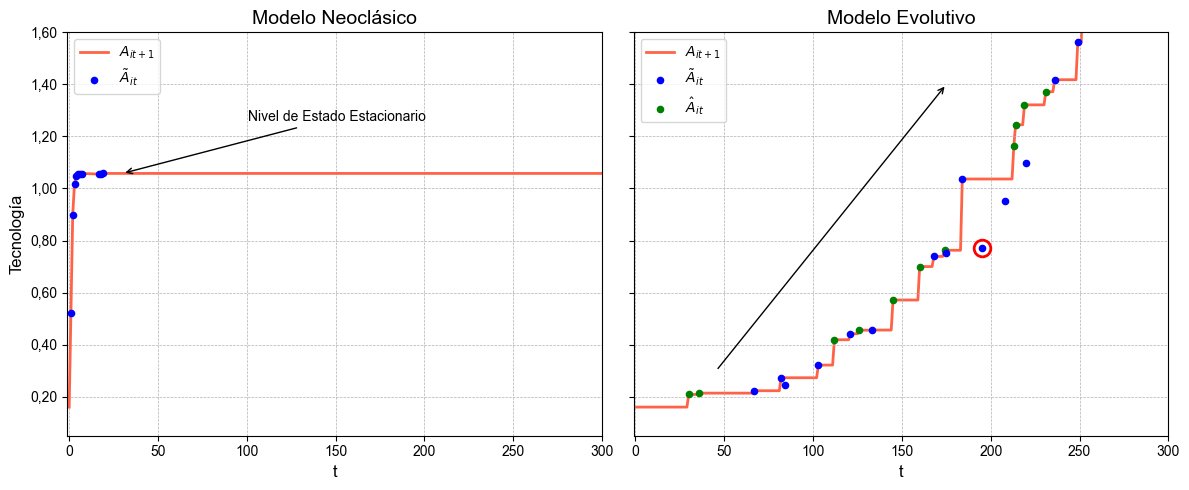

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import matplotlib.ticker as ticker

# Sacamos los resultados para la firma 1
A_it = [fila[0] for fila in resultados.A_it]
tildeA_it = [0] + [fila[0] for fila in resultados.tildeA_it]
tildeA_it1 = [0] + [fila[1] for fila in resultados.tildeA_it]
tildeA_it2 = [0] + [fila[2] for fila in resultados.tildeA_it]
hatA_it = [fila[0] for fila in resultados.hatA_it]
a = [1 if fila_hat[0] != fila_A[0] else 0 for fila_hat, fila_A in zip(resultados.hatA_it, resultados.A_it)]
producto = [0] + [h * b for h, b in zip(hatA_it, a)]

import matplotlib.pyplot as plt

# Crear la figura con dos subgráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

axes[0].plot(NEOA_t, label=r"$A_{it+1}$", linestyle="solid",  lw=2, color = 'tomato')
SS = NEOA_t[30]

axes[0].annotate(
    "Nivel de Estado Estacionario",
    xy=(30, SS),  # Posición del texto
    xytext=(100+0.5, SS + 0.2),  # Posición de inicio del texto
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=10
)
axes[0].scatter(range(len(cambios)), cambios, label=r"$\tilde A_{it}$", color="blue", marker="o", s=20, zorder=5)
axes[0].set_xlabel("t", fontsize=12)
axes[0].set_title(r"Modelo Neoclásico", fontsize=14)
axes[0].legend(loc='upper left', fontsize=10)

axes[1].plot(A_it, label=r"$A_{it+1}$", linestyle="solid", lw=2, color = 'tomato', zorder=1)
axes[1].annotate(
    "",
    xy=(175, 1.4),  # Posición del texto
    xytext=(45+0.5, 0.3),  # Posición de inicio del texto

    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=10
)
axes[1].scatter(range(len(tildeA_it)), tildeA_it, label=r"$\tilde A_{it}$", color="blue", marker="o", s=20, zorder=5)
axes[1].scatter(range(len(producto)), producto, label=r"$\hat A_{it}$", color="green", marker="o", s=20, zorder=4)
axes[1].plot(195, tildeA_it[195], 'o', markersize=12, color='red', markerfacecolor='none', markeredgewidth=2, zorder=7)
axes[1].set_xlabel("t", fontsize=12)
axes[0].set_ylabel("Tecnología", fontsize=12)
axes[1].set_title(r"Modelo Evolutivo", fontsize=14)
axes[1].set_xlim(-1, 300)
axes[1].set_ylim(0.05, 1.6)
axes[1].legend(loc='upper left', fontsize=10)

axes[1].grid(ls='dashed',lw=0.5)
axes[0].grid(ls='dashed',lw=0.5)
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.2f}".replace(".", ",")))    
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.2f}".replace(".", ",")))    
    

plt.savefig('Imagenes/Grafica1Neoclásico.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


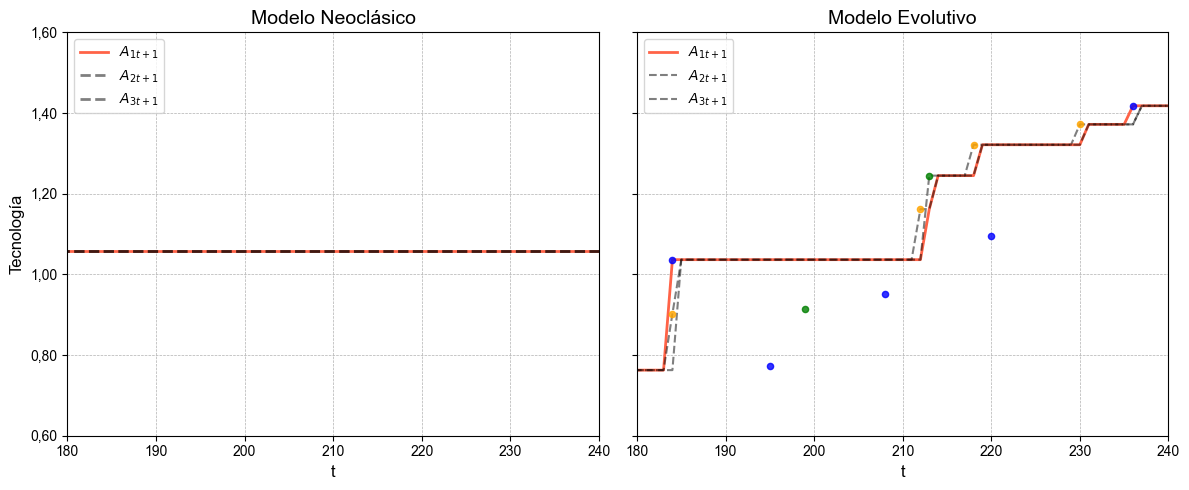

In [7]:
A_it2 = [fila[1] for fila in resultados.A_it]
A_it3 = [fila[2] for fila in resultados.A_it]


import matplotlib.pyplot as plt

# Crear la figura con dos subgráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

axes[0].plot(NEOA_t, label=r"$A_{1t+1}$", linestyle="solid", lw=2, color='tomato')
axes[0].plot(NEOA_t, label=r"$A_{2t+1}$", lw=2, color='black', linestyle="dashed",alpha=0.5)
axes[0].plot(NEOA_t, label=r"$A_{3t+1}$", lw=2, color='black', linestyle="dashed",alpha=0.5)

axes[0].set_xlabel("t", fontsize=12)
axes[0].set_title(r"Modelo Neoclásico", fontsize=14)
axes[0].scatter(range(len(cambios)), cambios, color="blue", marker="o", s=20, zorder=5,alpha=0.8)
axes[0].legend(loc='upper left', fontsize=10)
axes[0].grid(ls='dashed',lw=0.5)

axes[1].plot(A_it, label=r"$A_{1t+1}$", lw=2, color = 'tomato')
axes[1].plot(A_it2, label=r"$A_{2t+1}$", linestyle="dashed", lw=1.5, c='black',alpha=0.5)
axes[1].plot(A_it3, label=r"$A_{3t+1}$", linestyle="dashed", lw=1.5, c='black',alpha=0.5)
axes[1].scatter(range(len(tildeA_it)), tildeA_it, color="blue", marker="o", s=20, zorder=5, alpha = 0.8)
axes[1].scatter(range(len(tildeA_it)), tildeA_it1, color="green", marker="o", s=20, zorder=5, alpha = 0.8)
axes[1].scatter(range(len(tildeA_it)), tildeA_it2, color="orange", marker="o", s=20, zorder=5, alpha = 0.8)

axes[1].set_xlabel("t", fontsize=12)
axes[0].set_ylabel("Tecnología", fontsize=12)
axes[1].set_title(r"Modelo Evolutivo", fontsize=14)
axes[1].set_xlim(180,240)
axes[1].set_ylim(0.6, 1.6)
axes[1].legend(loc='upper left', fontsize=10)
axes[1].grid(ls='dashed',lw=0.5)
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.2f}".replace(".", ",")))    
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.2f}".replace(".", ",")))    


plt.savefig('Imagenes/Grafica2Neoclásico.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [8]:
resultados_simulaciones = []

for _ in range(50):  
    resultados = NWCap12()  # Ejecuta la simulación  
    maximos = [max(sublista) for sublista in resultados.A_it]  # Obtiene los valores máximos  
    resultados_simulaciones.append(maximos)  # Almacena en la lista de listas  

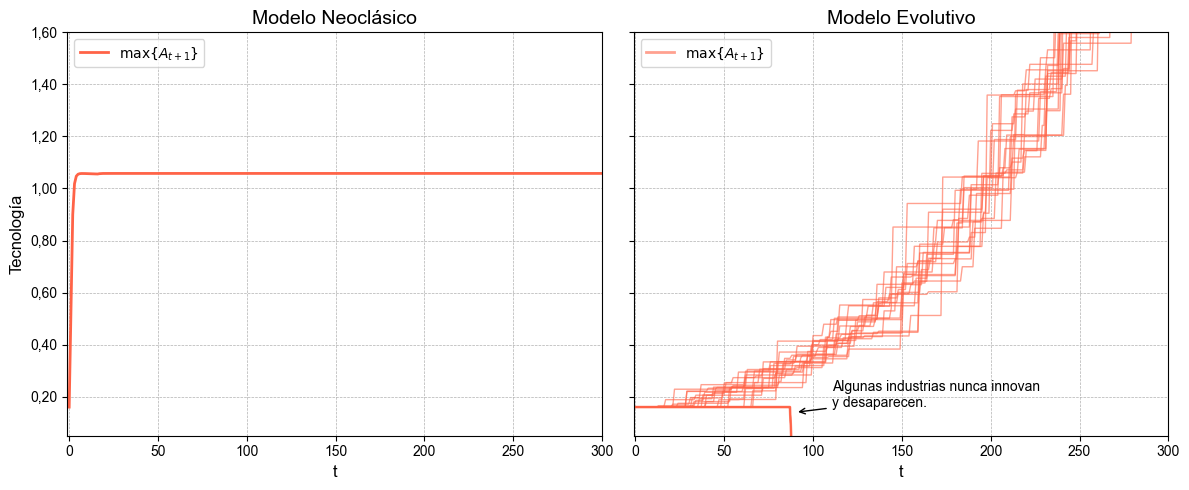

In [10]:
A_it2 = [fila[1] for fila in resultados.A_it]
A_it3 = [fila[2] for fila in resultados.A_it]


import matplotlib.pyplot as plt

# Crear la figura con dos subgráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

axes[0].plot(NEOA_t, label=r"$\max\{A_{t+1}\}$", linestyle="solid", lw=2, color='tomato')

axes[0].set_xlabel("t", fontsize=12)
axes[0].set_title(r"Modelo Neoclásico", fontsize=14)
axes[0].legend(loc='upper left', fontsize=10)
axes[0].grid(ls='dashed',lw=0.5)

for i in range(25):
    axes[1].plot(resultados_simulaciones[i], linestyle="solid", lw=1, color='tomato',alpha=0.6)

axes[1].plot(resultados_simulaciones[49], linestyle="solid", lw=2, color='tomato',alpha=0.6, label=r"$\max\{A_{t+1}\}$")
axes[1].set_xlabel("t", fontsize=12)
axes[1].annotate(
    "Algunas industrias nunca innovan\ny desaparecen.",
    xy=(90, 0.14),  # Posición del texto
    xytext=(110+0.5, 0.16),  # Posición de inicio del texto
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=10
)
axes[0].set_ylabel("Tecnología", fontsize=12)
axes[1].set_title(r"Modelo Evolutivo", fontsize=14)
axes[1].set_xlim(-1, 300)
axes[1].set_ylim(0.05, 1.6)
axes[1].legend(loc='upper left', fontsize=10)
axes[1].grid(ls='dashed',lw=0.5)
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.2f}".replace(".", ",")))    
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.2f}".replace(".", ",")))    


plt.savefig('Imagenes/Grafica3Neoclásico.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()
